# Fraud Detection with Keras

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras import optimizers
from keras import metrics
from sklearn.metrics import confusion_matrix
import numpy as np

sns.set_style('white')
pd.set_option('display.max_columns' , 500)

In [2]:
df = pd.read_csv('creditcard.csv')

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


##### Each feature is already scaled using a PCA transformation, except for Time and Amount. These columns need to be scaled as well to create a uniform data source.

In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_time = df['Time'].values.reshape(-1,1)
df['Time'] = scaler.fit_transform(scaled_time)

scaled_amt = df['Amount'].values.reshape(-1,1)
df['Amount'] = scaler.fit_transform(scaled_amt)

In [5]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.996583,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,-1.996583,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.996562,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-1.996562,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.996541,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


##### The dataset is heavily imbalanced: there are 284315 cases of regular transactions, and only 492 cases of fraudulent transactions.

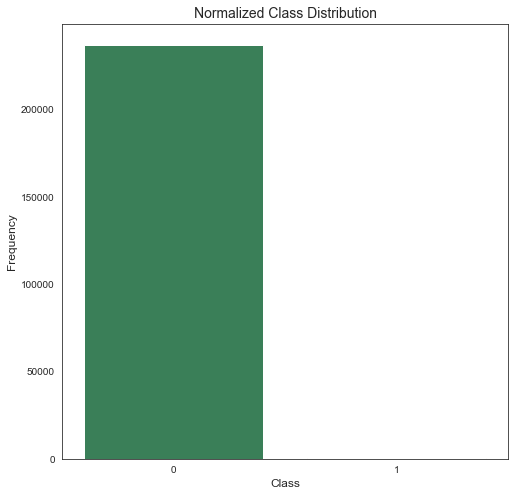

In [89]:
class_counts = df['Class'].value_counts()

fig = plt.figure(figsize = (8,8))
sns.barplot(x = class_counts.index, y = class_counts.values, palette = ['seagreen', 'tomato'])
plt.title('Normalized Class Distribution', fontsize = 14)
plt.xlabel('Class', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)

plt.savefig('norm.png')
plt.show()

In [7]:
print('Number of non-fraud instances: {}'.format(class_counts.values[0]))
print('Number of fraud instances: {}'.format(class_counts.values[1]))

Number of non-fraud instances: 284315
Number of fraud instances: 492


##### To solve the problem of an imbalanced dataset, we need to make a new one where there are an equal amount of fradulent and non-fradulent transactions. Without doing this, it would be too difficult to discern between the classes.

In [8]:
df = df.sample(frac=1)
fraud_df = df[df['Class'] == 1]
non_fraud_df = df[df['Class'] == 0][:492]

norm = pd.concat([fraud_df, non_fraud_df])

norm.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
33276,-1.213923,-7.923891,-5.198360,-3.000024,4.420666,2.272194,-3.394483,-5.283435,0.131619,0.658176,-0.794994,3.266066,-2.719185,-0.124104,-5.274866,0.638575,-2.995830,-4.698433,-1.711871,3.025261,-2.169811,-0.734308,-0.599926,-4.908301,0.410170,-1.167660,0.520508,1.937421,-1.552593,-0.304013,1
69980,-0.866657,-1.739341,1.344521,-0.534379,3.195291,-0.416196,-1.261961,-2.340991,0.713004,-1.416265,-2.996669,0.747478,-4.596612,-1.927760,-4.757074,-1.247815,-2.535494,-5.356465,-1.974749,-0.603726,0.002749,0.383180,-0.213952,-0.336640,0.237076,0.246003,-0.044228,0.510729,0.220952,-0.353229,1
81186,-0.757914,-4.384221,3.264665,-3.077158,3.403594,-1.938075,-1.221081,-3.310317,-1.111975,-1.977593,-3.288204,2.886091,-6.848978,-1.029235,-7.460103,0.055906,-4.334783,-9.874560,-3.541903,-0.531559,-0.141533,2.076383,-0.990303,-0.330358,0.158378,0.006351,-0.493860,-1.537652,-0.994022,-0.170757,1
245347,1.219173,0.051075,1.310427,0.733222,2.620282,1.402358,0.528489,1.086014,-0.146423,-1.724333,1.280167,0.470865,0.435542,0.594974,-0.142099,-2.024735,0.828291,-1.274787,0.134277,-1.489434,-0.125877,0.229936,0.766927,-0.189624,0.766853,-0.141401,-0.077278,-0.297595,-0.221816,-0.343354,1
234632,1.121106,1.261324,2.726800,-5.435019,5.342759,1.447043,-1.442584,-0.898702,0.123062,-2.748496,-3.202436,1.991361,-3.986416,0.577207,-8.485795,-0.794782,-0.666134,-1.372629,-0.104313,-1.466911,0.313332,0.209086,-0.425938,-0.154440,-0.018820,0.632234,0.192922,0.468181,0.280486,-0.346872,1


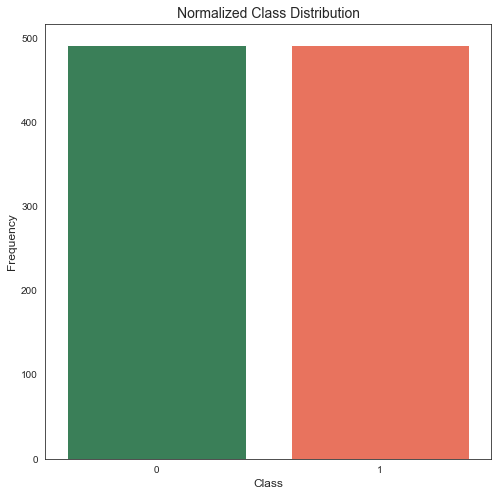

In [90]:
norm_class_counts = norm['Class'].value_counts()

fig = plt.figure(figsize = (8,8))
sns.barplot(x = norm_class_counts.index, y = norm_class_counts.values, palette = ['seagreen', 'tomato'])
plt.title('Normalized Class Distribution', fontsize = 14)
plt.xlabel('Class', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)

fig.savefig('norm2.png')
plt.show()

In [10]:
print('Number of non-fraud instances: {}'.format(norm_class_counts.values[0]))
print('Number of fraud instances: {}'.format(norm_class_counts.values[1]))

Number of non-fraud instances: 492
Number of fraud instances: 492


##### Now that we have an equal dataset, we can find the correlation between each variable to "Class".

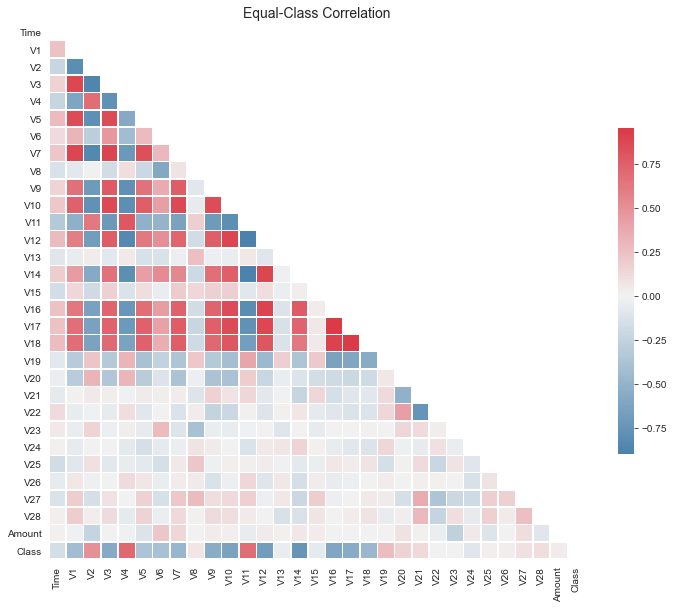

In [91]:
sub_sample_corr = norm.corr()
cmap = sns.diverging_palette(240, 10, as_cmap=True, n = 30)
mask = np.triu(np.ones_like(sub_sample_corr, dtype=bool))
fig = plt.figure(figsize = (12,12))

sns.heatmap(sub_sample_corr, mask = mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={'shrink' : .5})
plt.title('Equal-Class Correlation', fontsize = 14)

fig.savefig('equalcorr.png')
plt.show()

##### If the dataset is not equal, the correlation matrix will look like this; much different than the previous correlation matrix.

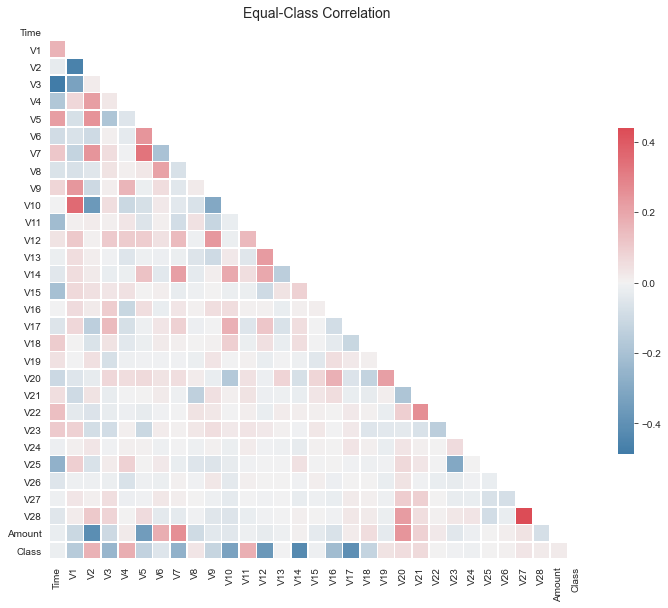

In [92]:
regular_corr = df.corr()

cmap = sns.diverging_palette(240, 10, as_cmap=True, n = 30)
mask = np.triu(np.ones_like(regular_corr, dtype=bool))
fig = plt.figure(figsize = (12,12))

sns.heatmap(regular_corr, mask = mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={'shrink' : .5})
plt.title('Equal-Class Correlation', fontsize = 14)

fig.savefig('unequalcorr.png')
plt.show()

##### To maximize the performance of our model, we need to remove variables that have the most (both negative and positive) correlation.

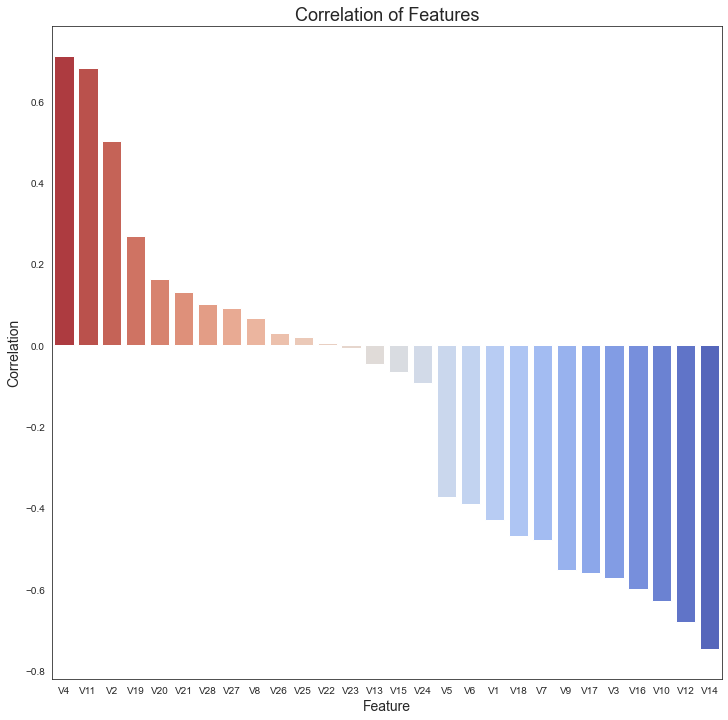

In [94]:
most_correlated = sub_sample_corr['Class'].drop(['Class', 'Time', 'Amount']).sort_values(ascending=False)
fig = plt.figure(figsize = (12,12))

sns.barplot(x = most_correlated.index, y = most_correlated.values, palette = 'coolwarm_r')
plt.title('Correlation of Features', fontsize = 18)
plt.xlabel('Feature', fontsize = 14)
plt.ylabel('Correlation', fontsize = 14)

fig.savefig('highestcorr.png')
plt.show()

##### These variables have close to 0 correlation to "Class".  When correlation is close to 0, there is not much variation between fradulent and non-fradulent transactions.

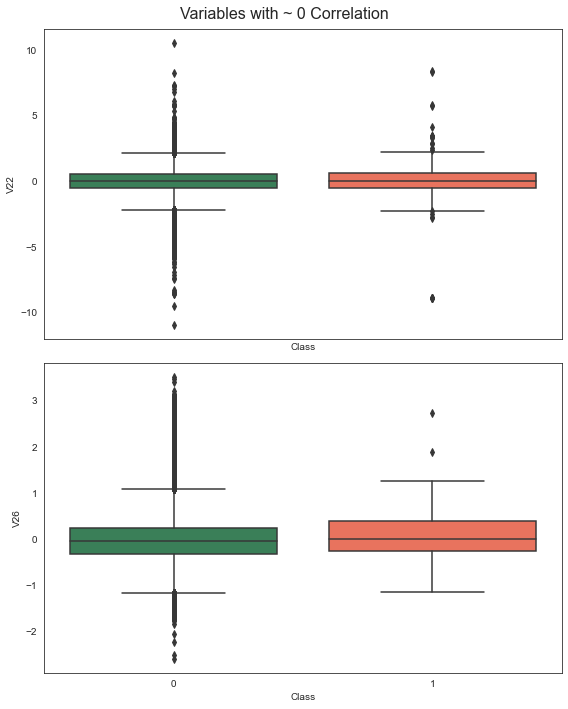

In [14]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (8,10), sharex=True, tight_layout=True)
ax1 = sns.boxplot(x = 'Class', y = 'V22', data = df, ax = ax1, palette = ['seagreen', 'tomato'])
ax2 = sns.boxplot(x = 'Class', y = 'V26', data = df, ax = ax2, palette = ['seagreen', 'tomato'])

fig.suptitle('Variables with ~ 0 Correlation', fontsize = 16)
plt.show()

##### These variables have high correlation. In this case, the fraudulent transactions (red) have higher values than non-fradulent transactions (green). Removing outliers from these variables will help our model predict between classes.

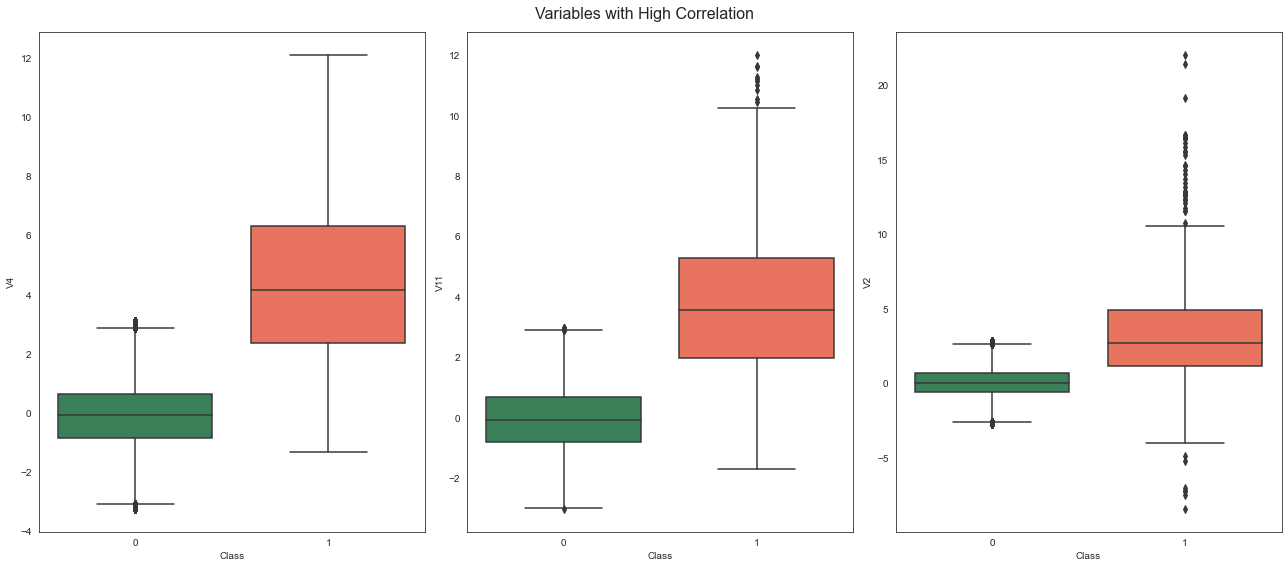

In [96]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (18,8), sharex=True, tight_layout=True)
sns.boxplot(x = 'Class', y = 'V4', data = df, ax = ax1, palette = ['seagreen', 'tomato'])
sns.boxplot(x = 'Class', y = 'V11', data = df, ax = ax2, palette = ['seagreen', 'tomato'])
sns.boxplot(x = 'Class', y = 'V2', data = df, ax = ax3, palette = ['seagreen', 'tomato'])


fig.suptitle('Variables with High Correlation', fontsize = 16)

plt.show()

##### Similarly, these variables have low correlation, meaning the values for fraudulent transactions (red) are usually lower than non-fraudulent transactions (green).

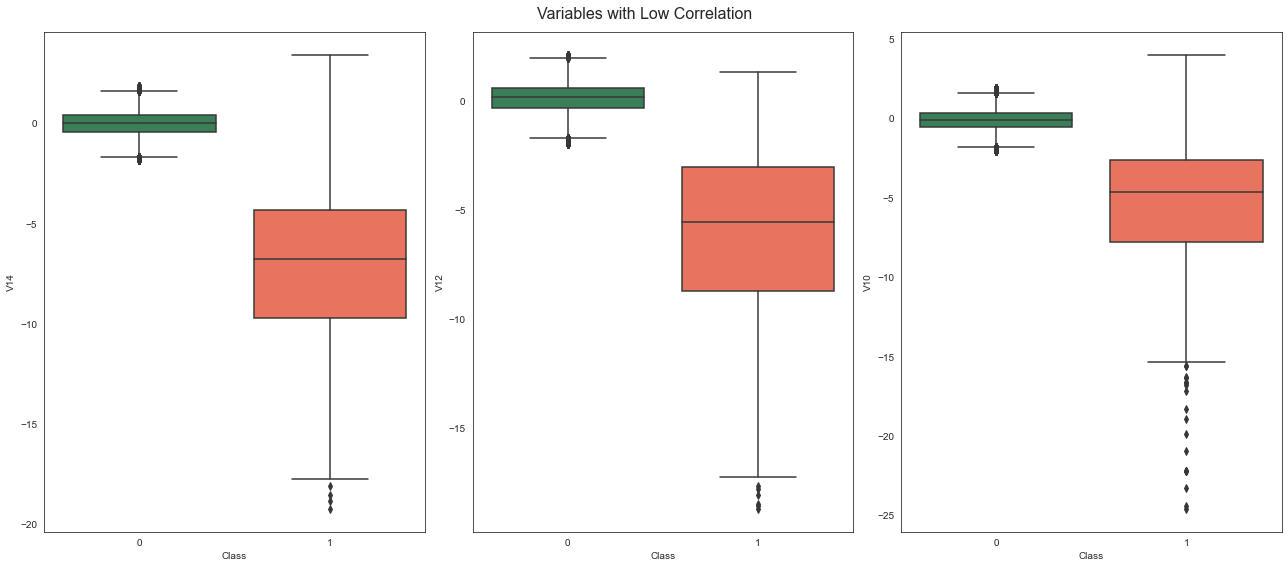

In [97]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (18,8), sharex=True, tight_layout=True)

sns.boxplot(x = 'Class', y = 'V14', data = df, ax = ax1, palette = ['seagreen', 'tomato'])
sns.boxplot(x = 'Class', y = 'V12', data = df, ax = ax2, palette = ['seagreen', 'tomato'])
sns.boxplot(x = 'Class', y = 'V10', data = df, ax = ax3, palette = ['seagreen', 'tomato'])

plt.subplots_adjust(wspace = .3)
fig.suptitle('Variables with Low Correlation', fontsize = 16)

plt.show()

##### To remove outliers from these variables, we will use IQR (Inter-Quartile Range). IQR removes variables that are higher than the 75th percentile, or lower than the 25th percentile. In the following graphs, green labels indicate a variable that is not an outlier, and red labels indicate a variable that is an outlier. We will be removing the outliers from non-fraudulent transactions so our model can discern between true outliers (fradulent activity), and noisy outliers (non-fradulent activity).

In [17]:
def get_outliers(col, data):

    c = sorted(data[col])
    q1, q3 = np.percentile(c, [25, 75])
    iqr = q3 - q1
    lower = q1 - (1.5 * iqr)
    upper = q3 + (1.5 * iqr)

    return data[(data[col] < lower) | (data[col] > upper)]

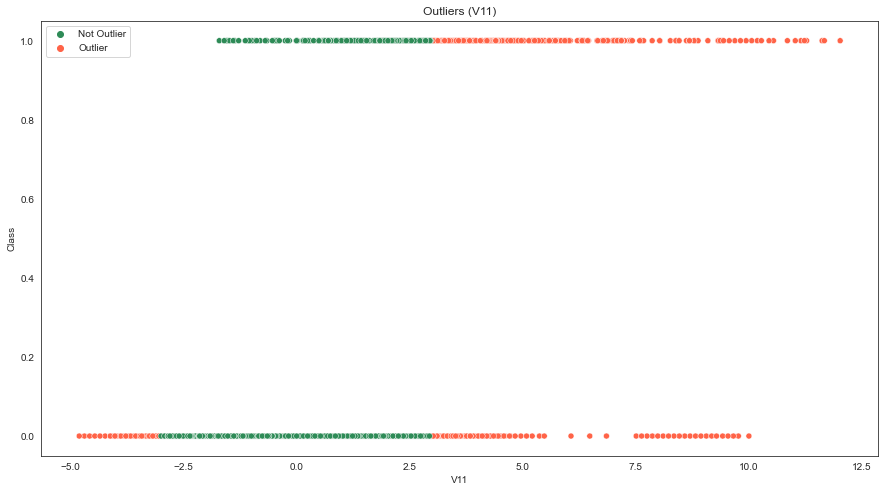

In [18]:
temp = df.copy()

v11_outliers = get_outliers('V11', df)

temp['V11_Outlier'] = 0
v11_mask = temp.index.isin(v11_outliers.index) == True
temp.loc[v11_mask, 'V11_Outlier'] = 1 


fig, ax = plt.subplots(1, 1, figsize = (15,8))
sns.scatterplot(x = 'V11', y = 'Class', data = temp, hue = 'V11_Outlier', 
           palette = ['seagreen', 'tomato'], ax = ax)




plt.title('Outliers (V11)')
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles,  ('Not Outlier', 'Outlier'))

del temp
plt.show()

In [19]:
print('Number of Outliers for V11 Found: {}'.format(len(v11_outliers.index)))

Number of Outliers for V11 Found: 780


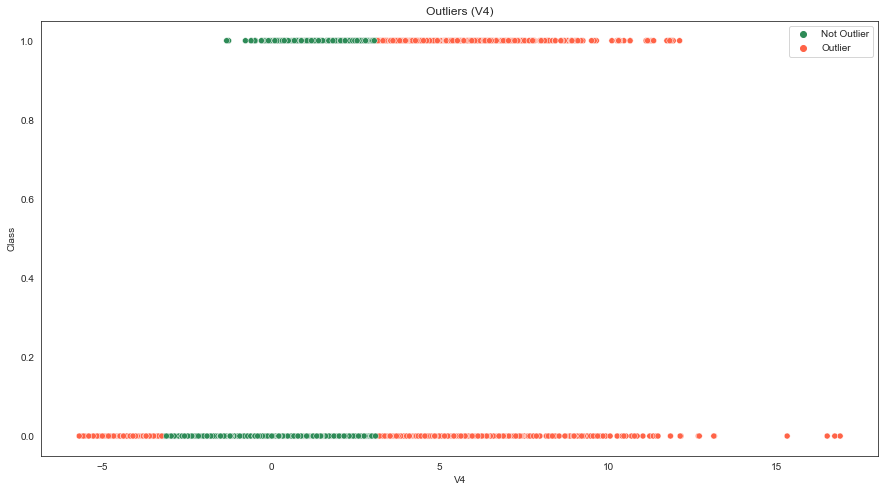

In [20]:
temp = df.copy()

v4_outliers = get_outliers('V4', df)

temp['V4_Outlier'] = 0
v4_mask = temp.index.isin(v4_outliers.index) == True
temp.loc[v4_mask, 'V4_Outlier'] = 1 


fig, ax = plt.subplots(1, 1, figsize = (15,8))
sns.scatterplot(x = 'V4', y = 'Class', data = temp, hue = 'V4_Outlier', 
           palette = ['seagreen', 'tomato'], ax = ax)




plt.title('Outliers (V4)')
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles,  ('Not Outlier', 'Outlier'))

del temp
plt.show()

In [21]:
print('Number of Outliers for V4 Found: {}'.format(len(v4_outliers.index)))

Number of Outliers for V4 Found: 11148


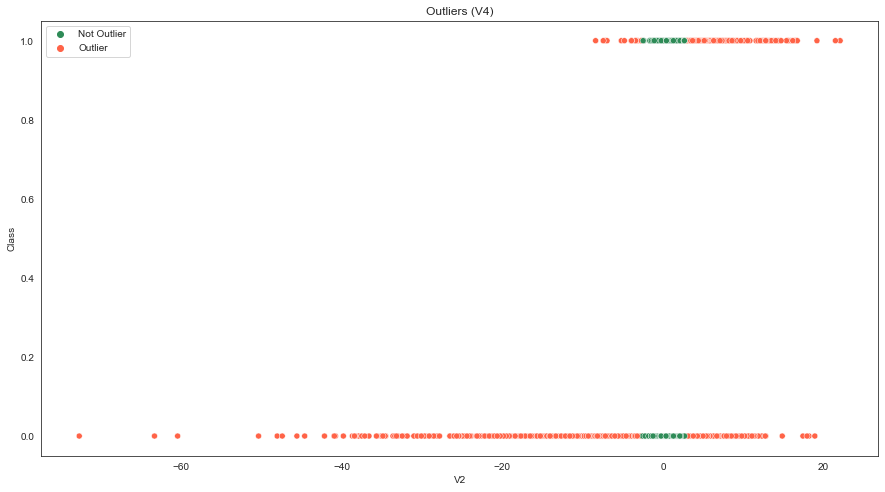

In [22]:
temp = df.copy()

v2_outliers = get_outliers('V2', df)

temp['V2_Outlier'] = 0
v2_mask = temp.index.isin(v2_outliers.index) == True
temp.loc[v2_mask, 'V2_Outlier'] = 1 


fig, ax = plt.subplots(1, 1, figsize = (15,8))
sns.scatterplot(x = 'V2', y = 'Class', data = temp, hue = 'V2_Outlier', 
           palette = ['seagreen', 'tomato'], ax = ax)




plt.title('Outliers (V4)')
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles,  ('Not Outlier', 'Outlier'))

del temp
plt.show()

In [23]:
print('Number of Outliers for V2 Found: {}'.format(len(v2_outliers.index)))

Number of Outliers for V2 Found: 13526


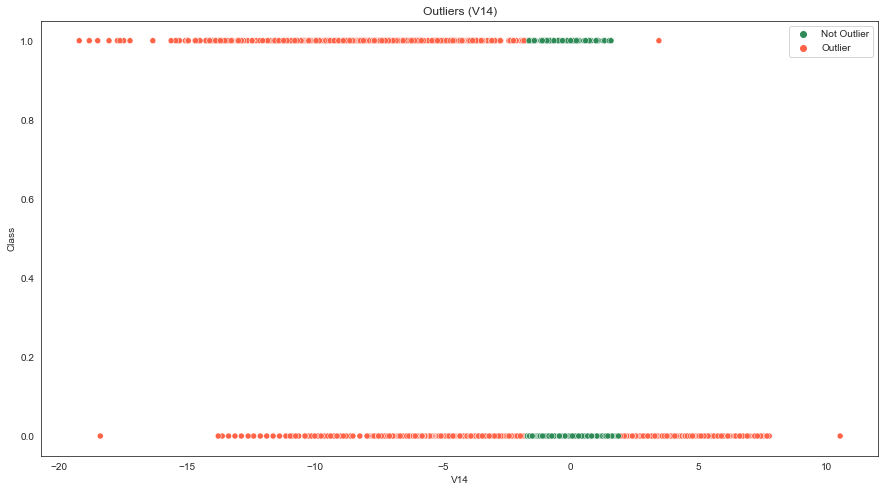

In [24]:
temp = df.copy()

v14_outliers = get_outliers('V14', df)

temp['V14_Outlier'] = 0
v14_mask = temp.index.isin(v14_outliers.index) == True
temp.loc[v14_mask, 'V14_Outlier'] = 1 


fig, ax = plt.subplots(1, 1, figsize = (15,8))
sns.scatterplot(x = 'V14', y = 'Class', data = temp, hue = 'V14_Outlier', 
           palette = ['seagreen', 'tomato'], ax = ax)




plt.title('Outliers (V14)')
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles,  ('Not Outlier', 'Outlier'))

del temp
plt.show()

In [25]:
print('Number of Outliers for V14 Found: {}'.format(len(v2_outliers.index)))

Number of Outliers for V14 Found: 13526


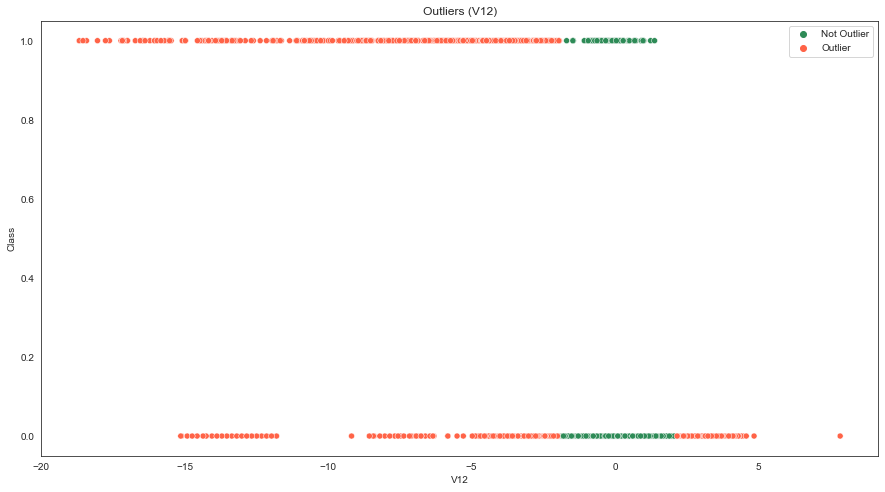

In [26]:
temp = df.copy()

v12_outliers = get_outliers('V12', df)

temp['V12_Outlier'] = 0
v12_mask = temp.index.isin(v12_outliers.index) == True
temp.loc[v12_mask, 'V12_Outlier'] = 1 


fig, ax = plt.subplots(1, 1, figsize = (15,8))
sns.scatterplot(x = 'V12', y = 'Class', data = temp, hue = 'V12_Outlier', 
           palette = ['seagreen', 'tomato'], ax = ax)




plt.title('Outliers (V12)')
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles,  ('Not Outlier', 'Outlier'))

del temp
plt.show()

In [27]:
print('Number of Outliers for V12 Found: {}'.format(len(v12_outliers.index)))

Number of Outliers for V12 Found: 15348


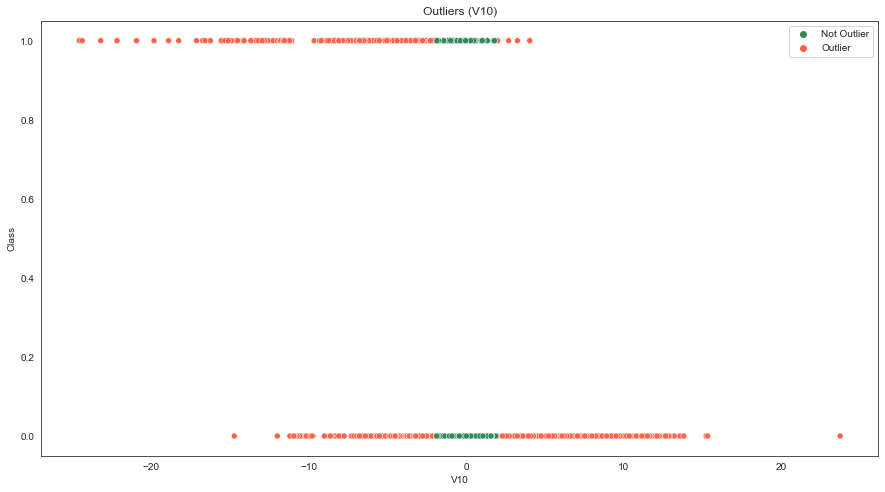

In [28]:
temp = df.copy()

v10_outliers = get_outliers('V10', df)

temp['V10_Outlier'] = 0
v10_mask = temp.index.isin(v10_outliers.index) == True
temp.loc[v10_mask, 'V10_Outlier'] = 1 


fig, ax = plt.subplots(1, 1, figsize = (15,8))
sns.scatterplot(x = 'V10', y = 'Class', data = temp, hue = 'V10_Outlier', 
           palette = ['seagreen', 'tomato'], ax = ax)




plt.title('Outliers (V10)')
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles,  ('Not Outlier', 'Outlier'))

del temp
plt.show()

In [29]:
print('Number of Outliers for V12 Found: {}'.format(len(v10_outliers.index)))

Number of Outliers for V12 Found: 9496


##### Finding rows in our original dataframe that have an outlier, and removing them from the dataframe.

In [31]:
to_drop = list(set().union(v2_outliers.index,
                            v11_outliers.index, 
                            v4_outliers.index, 
                            v14_outliers.index, 
                            v10_outliers.index, 
                            v12_outliers.index))

idx = []

for i in to_drop:
    if df.at[i, 'Class'] == 0:
        idx.append(i)
        

print('Total Rows Removed: {}'.format(len(idx)))

Total Rows Removed: 47107


In [32]:
df = df.drop(idx)

# Model Implementation

> For this problem, we will be using a simple Keras model with four layers: two Dense layers, followed by a Dropout of 50%, and finally a Dense layer to predict the output.

In [33]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras import optimizers
from keras import metrics

In [49]:
X = df.drop('Class', axis=1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size = .2)

In [50]:
model = Sequential([
    Dense(30, activation = 'relu', input_dim = 30), 
    Dense(32, activation = 'relu'),
    Dropout(.5),
    Dense(2, activation = 'softmax')
])

model.compile(loss='sparse_categorical_crossentropy', optimizer= 'adam', metrics= ['accuracy'])

In [52]:
model_history = model.fit(X_train, y_train, epochs=25, batch_size=25, shuffle=True)

Epoch 1/25
7607/7607 [==============================] - 4s 507us/step - loss: 0.0029 - accuracy: 0.9996
Epoch 2/25
7607/7607 [==============================] - 4s 535us/step - loss: 0.0025 - accuracy: 0.9997
Epoch 3/25
7607/7607 [==============================] - 4s 530us/step - loss: 0.0024 - accuracy: 0.9997
Epoch 4/25
7607/7607 [==============================] - 4s 542us/step - loss: 0.0021 - accuracy: 0.9997
Epoch 5/25
7607/7607 [==============================] - 4s 585us/step - loss: 0.0020 - accuracy: 0.9997
Epoch 6/25
7607/7607 [==============================] - 5s 594us/step - loss: 0.0019 - accuracy: 0.9997
Epoch 7/25
7607/7607 [==============================] - 4s 558us/step - loss: 0.0018 - accuracy: 0.9997
Epoch 8/25
7607/7607 [==============================] - 4s 550us/step - loss: 0.0018 - accuracy: 0.9997
Epoch 9/25
7607/7607 [==============================] - 4s 558us/step - loss: 0.0018 - accuracy: 0.9998
Epoch 10/25
7607/7607 [==============================] - 4s 546u

### *Confusion Matrix*

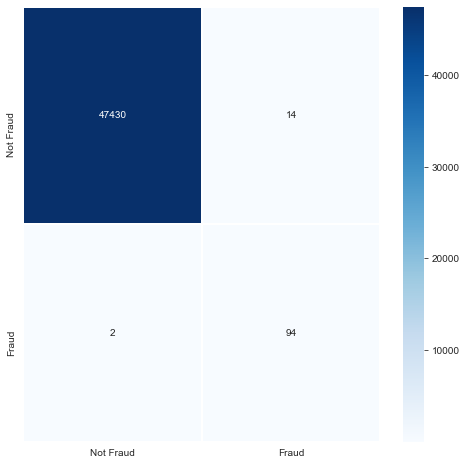

In [87]:
pred = model.predict(X_test)
y_pred = pred.argmax(axis=-1)

labels = {'Not Fraud' : 0, 'Fraud' : 1}
mat = confusion_matrix(y_pred, y_test)

fig = plt.figure(figsize = (8,8))
sns.heatmap(mat, 
    annot = True, fmt = 'd', linewidths = 1, cmap = 'Blues', 
            xticklabels = labels.keys(), yticklabels = labels.keys())

fig.savefig('confmat.png')
plt.show()

### *ROC - Curve*

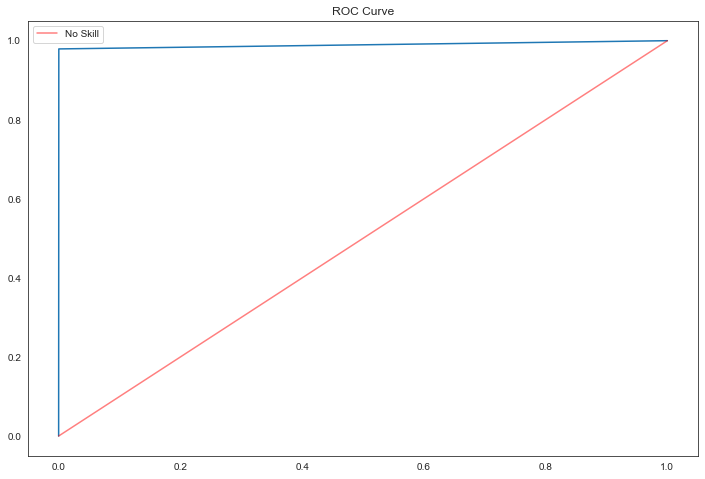

In [88]:
from sklearn.metrics import roc_curve


y_pred = model.predict(X_test)
y_classes = y_pred.argmax(axis=-1)
fpr, tpr, _ = roc_curve(y_classes, y_test)

zero_probs = np.zeros(len(y_test))
zero_fpr, zero_tpr, _ = roc_curve(y_classes, zero_probs)


fig = plt.figure(figsize = (12,8))
sns.lineplot(x = fpr, y = tpr)
sns.lineplot(x = zero_fpr, y = zero_tpr, label = 'No Skill', color = 'red', alpha = .5)


fig.savefig('roc.png')
plt.title('ROC Curve')
plt.show()

In [98]:
print('Percentage of fraud caught (TNR): % {}'.format((1 - fpr[1]) *100 ))

print('Percentage of fraud not caught (FPR): % {}'.format(fpr[1] * 100 ))

Percentage of fraud caught (TNR): % 99.97049152685271
Percentage of fraud not caught (FPR): % 0.029508473147289434


### *Accuracy*

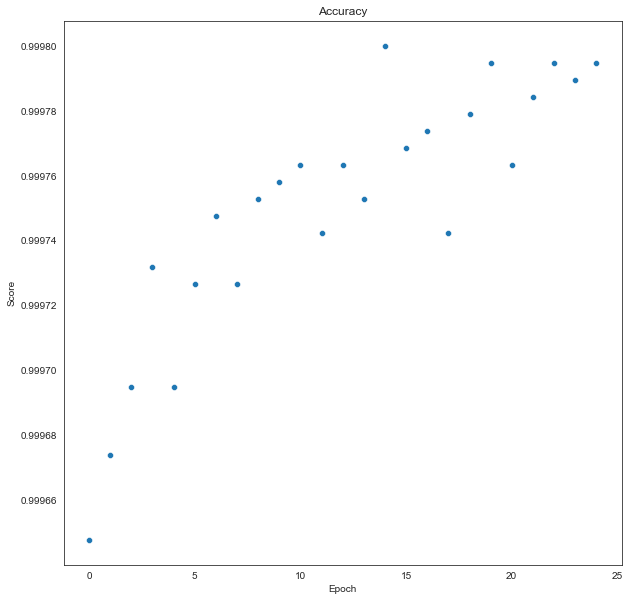

In [86]:
fig = plt.figure(figsize = (10,10))
epochs = [i for i in range(0,25)]
sns.scatterplot(x = epochs, y =  model_history.history['accuracy'])
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Score')
plt.show()

### *Loss*

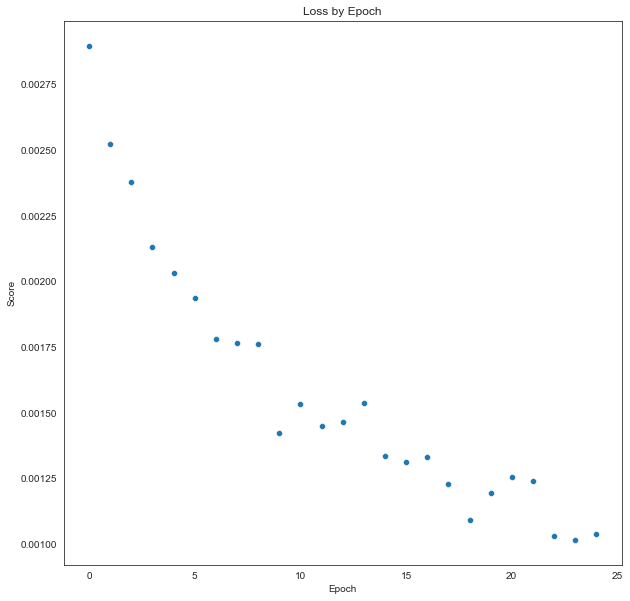

In [85]:
fig = plt.figure(figsize = (10,10))
epochs = [i for i in range(0,25)]
sns.scatterplot(x = epochs, y =  model_history.history['loss'])
plt.title('Loss by Epoch')
plt.xlabel('Epoch')
plt.ylabel('Score')
plt.show()

# *Summary*

> Our model performed very well with a TNR of 99.97%. There were two cases where the model predicted fraud when it was a normal transaction, which is only a minor inconvenience. However, our model let fraudulent transactions go through 14 times. To fix this, we could tweak with the layers in the model, raise the number of epochs, or lower the IQR range for removing outliers.